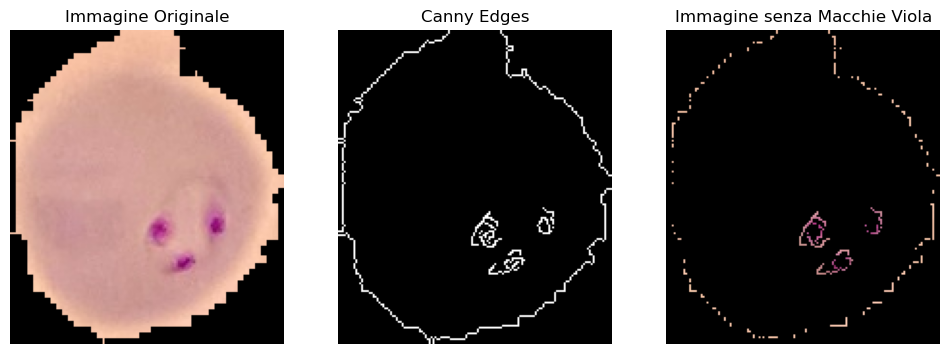

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carica l'immagine
image = cv2.imread('FESI/Progetto/malaria/malaria/parasite (1).png')

# Converti l'immagine in scala di grigi
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Esegui il rilevamento dei bordi usando Canny
edges = cv2.Canny(gray, threshold1=50, threshold2=150)

# Crea una maschera basata sui bordi
mask = np.zeros_like(image)
mask[edges != 0] = [255, 255, 255]  # Imposta i bordi su bianco

# Converti l'immagine in HSV per identificare il colore viola
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definisci il range di colore per il viola in HSV
lower_purple = np.array([120, 50, 50])  # Limite inferiore del viola
upper_purple = np.array([160, 255, 255])  # Limite superiore del viola

# Crea una maschera per il colore viola
purple_mask = cv2.inRange(hsv, lower_purple, upper_purple)

# Rimuovi il viola usando la maschera viola
result = cv2.bitwise_and(image, image, mask=~purple_mask)

# Creare una maschera di 3 canali basata sui bordi
mask_3_channels = cv2.merge([mask[:, :, 0], mask[:, :, 1], mask[:, :, 2]])

# Applica la maschera basata sui bordi all'immagine filtrata
result = cv2.bitwise_and(result, mask_3_channels)

# Mostra i risultati
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Immagine Originale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Immagine senza Macchie Viola')
plt.axis('off')

plt.show()
